## Implementation Of CIFAR10 Using TensorFlow & keras Sequential API In Python

*Import TensorFlow & Matplotlib*


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

 ***Download and prepare the CIFAR10 dataset***

* The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.

* The dataset is divided into 50,000 training images and 10,000 testing images

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

***Normalize pixel values to be between 0 and 1***

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

***Verify the data:***

*To verify that the dataset looks let's plot the first 36 images*

*from the training set and display the class name below each image*


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

* The CIFAR labels happen to be arrays, which is why you need the extra index

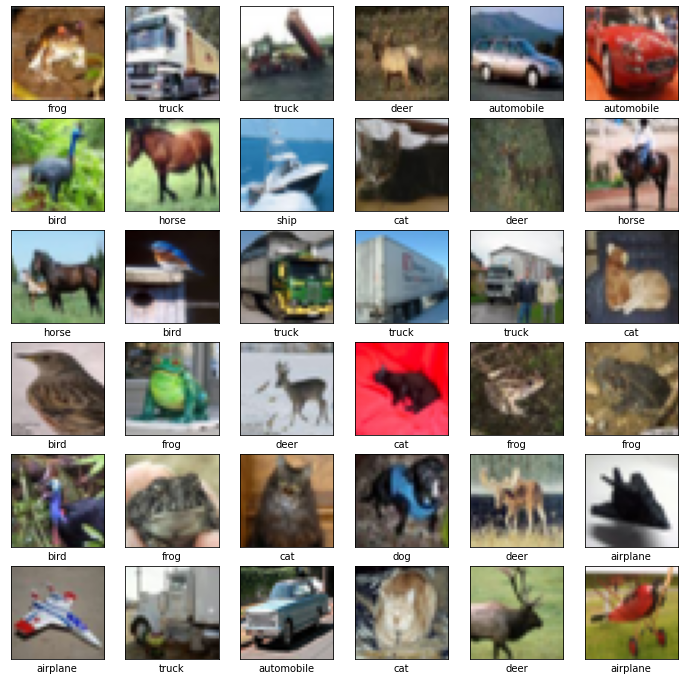

In [5]:
plt.figure(figsize=(12,12))  
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

***Create the convolutional base
As input, a CNN takes tensors of shape (image_height, image_width, color_channels)***

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

***Let's display the architecture of our model so far***

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


***Adding dense layers on top***

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

***Again checking architecture of model***

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

***Compile and train the model***

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,  
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5358 - accuracy: 0.4391 - val_loss: 1.2452 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1807 - accuracy: 0.5796 - val_loss: 1.1170 - val_accuracy: 0.6039
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0271 - accuracy: 0.6380 - val_loss: 0.9846 - val_accuracy: 0.6510
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9258 - accuracy: 0.6752 - val_loss: 0.9721 - val_accuracy: 0.6634
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8504 - accuracy: 0.7004 - val_loss: 0.9325 - val_accuracy: 0.6777
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7934 - accuracy: 0.7223 - val_loss: 0.9283 - val_accuracy: 0.6828
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7435 - accuracy: 0.7404 - val_loss: 0.8707 -

***Evaluate the model***

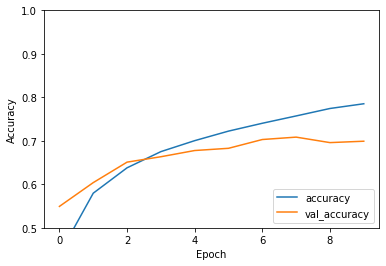

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.9082 - accuracy: 0.6991


***Testing the accuracy***

In [13]:
print(test_acc)

0.6991000175476074
